## Solar Energy Prediction using Bureau of Meteorology (BOM), Australia's Data
**Author: Prathyusha Sangam**

### Document Outline
* [About the data](#About-the-data)
* [Project objective](#Project-objective)
* [Expected challenges](#Expected-challenges)
* [Step 1: Set up imports and load data](#Step-1:-Set-up-imports-and-load-data)
* [Step 2: Understand the data](#Step-2:-Understand-the-data)
    * [A quick look at the data](#A-quick-look-at-the-data)
* [Step 3: Visalizing the data](#Step-3:-Visualizing-the-data)
    * [Weather features histogram](#Step-3:-Visualizing-the-data)
    * [Correlation among the weather features](#Visualizing-correlation-among-the-weather-features)
    * [Visualizing Timeseries of weather features](#Visualizing-Timeseries)
* [Findings of descriptive stats and visualization](#Findings-of-descriptive-stats-and-visualization)
* [Step 4: Decisions related to algorithm implementation](#Step-4:-Decisions-related-to-algorithm-implementation)
* [Step 5: Train / Test Data preparation](#Step-5:-Train-/-Test-Data-preparation)
* [Step 6: Support Vector Regression](#Step-6:-Support-Vector-Regression)
* [Step 7: Decision Tree Regression](#Step-7:-Decision-Tree-Regression)
* [Step 8:  Plots of actual and predicted values of SVR and DTR (for 2017)](#Step-8:--Plots-of-actual-and-predicted-values-of-SVR-and-DTR-(for-2017))
    * [Analysing the prediction plots](#Analysing-the-prediction-plots)
* [Step 9: Testing on Jan- Mar 2018: Is this model workable beyond 2017?](#Step-9:-Testing-on-Jan--Mar-2018:-Is-this-model-workable-beyond-2017?)

### About the data
The data is obtained from The Bureau of Meteorology (BOM), Australia. The data has weather information collected every day, in Perth Metro area, during the period January 2015- December 2017. The features chosen for this project are:
* Date : Year, Month, Day
* Rainfall amount: in milliliters
* Maximum Temperature: in degree Celsius
* Daily global solar exposure: in MJ m-2  (value to predict)

### Project objective
1. To predict the daily **solar exposure** values given the expcted **date, rainfall amount and maximum temperature**
2. Techniques used: Decision trees and SVM

### Expected challenges 
1\. **Complexity of weather systems:** Weather systems are usually very complex and use decades of historical and dynamic data to compute predictions. The parameters chosen for our predictive model - date, rainfall amount and maximum temperature,are not enough to make good predictions. For instance, anomolies in weather such as tropical cyclones can be caused by El Nino and/or La Nina, which is not captured by these features.

2\. **Features governing solar exposure** The solar exposure value (target) on any given day, not only depends on weather conditions and season (which can be deduced from date) but can largely be affected by the amount of greenhouse gases as well. (image below)

3\. **Date feature could lead to noise** It is easier to attain a model which can predict solar exposure based on rainfall amount and maximum temperature (only). Adding date feature might lead to noise, because knowing the day-month of the year will give an intuition about the season, but doesn't ensure expected weather.

SOLAR ENERGY CYCLE: CLIMATE SYSTEM 


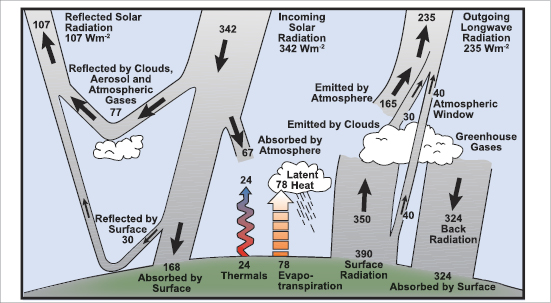

In [1]:
from IPython.display import Image
print("SOLAR ENERGY CYCLE: CLIMATE SYSTEM ")
Image(filename="Images/climate_system.jpeg")

### Step 1: Set up imports and load data

In [2]:
# allowing multiple/scrollable outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data df3: 2015-16, df_test:2017

df3 = pd.read_csv('Datasets/BOM2015_17.csv') #collated CSV from multiple files obtained from BOM, Australia
df3.columns = ['year','month','day','max_temp','rainfall','solar_exposure']

#testing entire year 2017
df_test = df3.loc[(df3['year']==2017)]

#Training on years 2015,16
df3 = df3[df3.year<2017]

#Additional data to validate model further
df_test_2018 = pd.read_csv("Datasets/BOM2018_test.csv")
df_test_2018.columns = ['year','month','day','max_temp','rainfall','solar_exposure']


#uncomment to view the data
#df3.head()
#df_test.head()
#df_test_2018.head()

[Back to top](#Document-Outline)
### Step 2: Understand the data

* Check for nulls
* we create a new feature called **Date** by combining date parts -  To understand timeseries of weather parameters better (for visualization)

### A quick look at the data

In [4]:
# combining date parts to obtain 1 pandas date column
df3 = df3.assign(date=pd.to_datetime(df3[['year','month','day']]))

#View the training data frame
df3.head()

#any nulls?
df3.isnull().sum()

,year,month,day,max_temp,rainfall,solar_exposure,date
0,2015,1,1,28.5,0.0,32.9,2015-01-01
1,2015,1,2,26.3,0.0,24.2,2015-01-02
2,2015,1,3,29.5,0.0,32.6,2015-01-03
3,2015,1,4,34.7,0.0,32.7,2015-01-04
4,2015,1,5,44.4,0.0,27.4,2015-01-05


year              0
month             0
day               0
max_temp          0
rainfall          0
solar_exposure    0
date              0
dtype: int64

[Back to top](#Document-Outline)
### Weather Features: Descriptive Statistics

In [5]:
# for quick view of weather features 'Max_Temp','Rainfall_Amt' and 'Solar_Exposure'
featureframe = df3[['max_temp','rainfall','solar_exposure']]

featureframe.describe()

,max_temp,rainfall,solar_exposure
count,731.000000,731.000000,731.000000
mean,24.880985,1.824350,18.922982
std,6.322238,5.184107,8.049900
min,14.200000,0.000000,3.500000
25%,19.600000,0.000000,11.900000
50%,23.800000,0.000000,17.600000
75%,29.500000,0.400000,26.100000
max,44.400000,42.800000,33.400000


[Back to top](#Document-Outline)
### Step 3: Visualizing the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157bbcc0>,
      dtype=object)

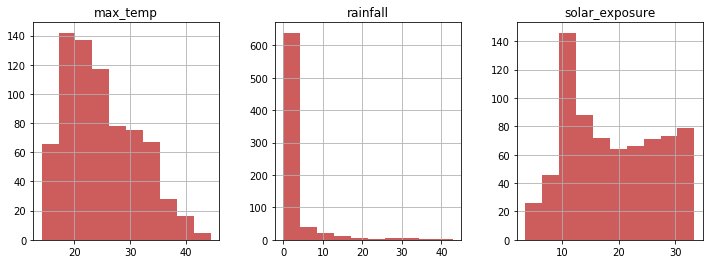

In [6]:
#distribution of weather features  (y-axis of histogram is frequency)

featureframe.hist(layout = (1,3),figsize=(12,4), color = 'indianred')

### Visualizing correlation among the weather features

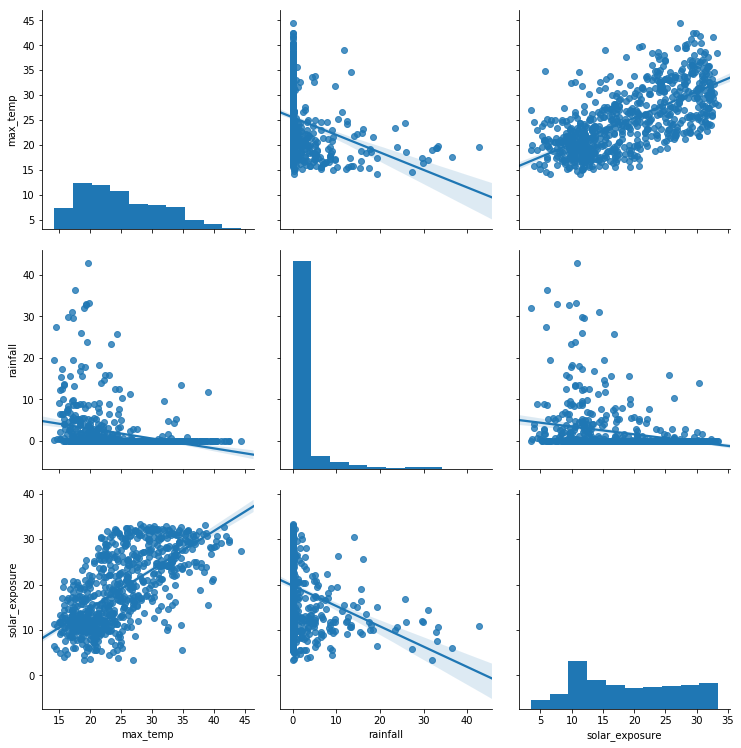

In [7]:
# correlation between weather features: 'Max_Temp','Rainfall_Amt' and 'Solar_Exposure'
sns.pairplot(featureframe,size=3.5,kind="reg")

### Visualizing Timeseries

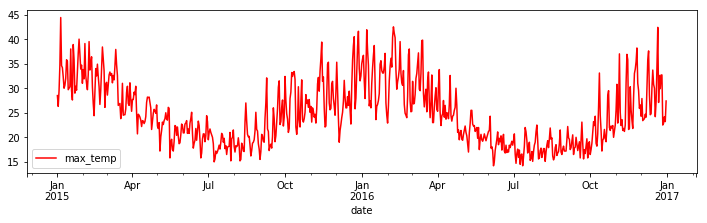

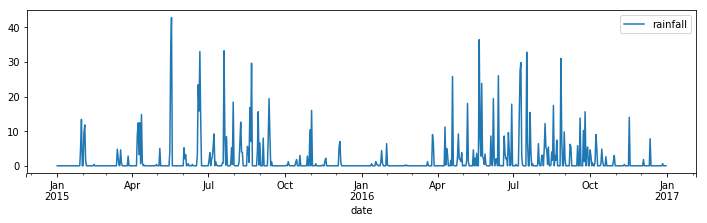

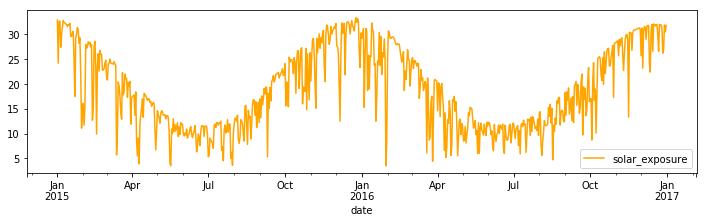

In [8]:
#visualizing Features vs Date: Time series

df3.plot(x='date',y='max_temp',figsize=(12,3), color='red')
df3.plot(x='date',y='rainfall',figsize=(12,3))
df3.plot(x='date',y='solar_exposure',figsize=(12,3), color='orange')

[Back to top](#Document-Outline)
### Findings of descriptive stats and visualization
1\. Data has **no missing values**.

2\. **Maximum Temperature (max_temp):** Describes the maximum temperature recorded on any given day in °C. max_temp seems uniformly distributed, with a very slight skew with **mean: 24.88°C, median: 23.8°C, maximum: 44.4°C**. Perth seems to have very pleasant temperature on an average, with small number of records for extremely high or very low temperatures.

3\. **Rainfall Amount (rainfall)** Describes the total daily rainfall in milliliters. The data is heavily skewed, with **mean: 1.82 ml and median: 0 ml**, 75% of the data has values under 0.4 ml, the **maximum: 42.8 ml**, on the whole rainfall above 30 ml (on a day) is a very rare event. 

4\. **Global Solar Exposure (solar_exposure)** Describes the total solar energy for a day falling on a horizontal surface, measured in MJ m-2, with **mean:18.9, median: 17.6, maximum: 33.4**. The data looks bimodal from its histogram. Perth receives moderate to high solar exposure.

5\. **Correlations:** From the correlation matrix we see a strong positive correlation between max_temp and solar_exposure (more exposure, more heat), negative correlation between rainfall and solar_exposure (less solar exposure due to cloud cover), and a slight negative correlation between rainfall and max_temp (cooler rainy days), however some outliers in this relationship exist (hot rainy days).

6\. **Weather Features vs Time:** Seasonal trends in weather parameters are visible from the timeseries plots. From the plots of years 2015-16, we notice that Perth observes maximum temperatures in Dec and Jan and some of the least temperatures in July and Aug (note the recorded values are max_temp of each day), same applies to global solar exposure.

7\. **Anomalies in test data:** For example, on Feb 10, 2017, Perth experienced severe floods (114.4 mm), so is the case on Jun 22, 2017(61.2 mm). The reasons behind these anomalies cannot be deduced from the data we have; i.e., they're independent of time of the year and the weather parameters we possess for this ML task.

[Back to top](#Document-Outline)
### Step 4: Decisions related to algorithm implementation

1\. Given the objective (predicting daily solar exposure) and the information we have, the predictions made are based on Day and Month of the year and are independent of the year itself (2015,2016 etc), hence Year column can be ignored during training.

2\. The algorithms used are Support Vector Regressor and Decision Tree Regressor. All features in dataset have different units, some distributions are heavily skewed, hence, data has to be scaled using StandardScaler 
(Traditionally,a time series prediction model such as ARIMA would be used for a task like this.) 


[Back to top](#Document-Outline)
### Step 5: Train / Test Data preparation

In [9]:
# separate X and y(label) for training/ testing

#2015-16 data
X_train = df3[['day','month','max_temp','rainfall']]
y_train = df3[['solar_exposure']]

#2017 data
X_test = df_test[['day','month','max_temp','rainfall']]
y_test = df_test[['solar_exposure']]

[Back to top](#Document-Outline)
### Step 6: Support Vector Regression
Hyperparameter consideration: C=10, epsilon =1, gamma=0.2

In [10]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

svr_reg = Pipeline(( 
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=10.0, epsilon = 1.0, gamma = 0.2))
               ))

svr_reg.fit(X_train,y_train)


#R2 value train
svr_score_train = svr_reg.score(X_train, y_train, sample_weight=None)

#R2 score for test
svr_score_test= svr_reg.score(X_test, y_test, sample_weight=None)


svr_model = pd.DataFrame({
    'Performance Measures': ['Training R2 of SVR', 'Testing R2 of SVR'],
    'Scores': [svr_score_train,svr_score_test]})

svr_model


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma=0.2,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

,Performance Measures,Scores
0,Training R2 of SVR,0.815065
1,Testing R2 of SVR,0.786622


[Back to top](#Document-Outline)
### Step 7: Decision Tree Regression
Hyperparameter consideration: max_depth =4 (to avoid overfit)

In [11]:
from sklearn.tree import DecisionTreeRegressor

#DTR
dt_reg = Pipeline(( 
    ('scaler', StandardScaler()),
    ('svr', DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=4, random_state=100))
               ))
#train
dt_reg.fit(X_train,y_train)


#train scores
dtr_score_train = dt_reg.score(X_train, y_train, sample_weight=None)
#test scores
dtr_score_test = dt_reg.score(X_test, y_test, sample_weight=None)


dtr_model = pd.DataFrame({
    'Performance Measures': ['Training R2 of DTR', 'Testing R2 of DTR'],
    'Scores': [dtr_score_train,dtr_score_test]})

dtr_model

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best'))])

,Performance Measures,Scores
0,Training R2 of DTR,0.795393
1,Testing R2 of DTR,0.745033


[Back to top](#Document-Outline)
### Step 8:  Plots of actual and predicted values of SVR and DTR (for 2017)

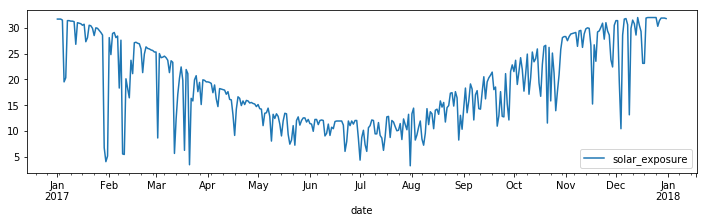

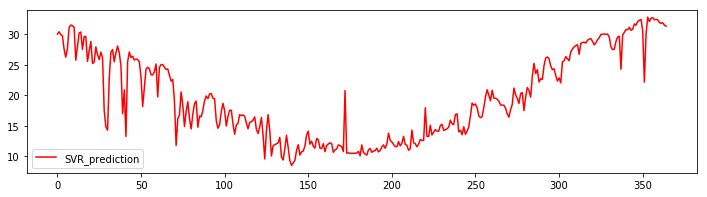

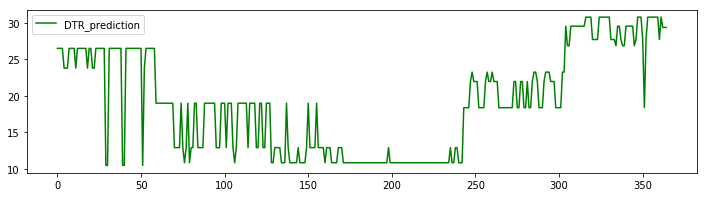

In [12]:
#plotting actual vs predicted values of solar_exposure in the year 2017

df_test = df_test.assign(date=pd.to_datetime(df_test[['year','month','day']]))

#predicted SVR
predicted_svr = pd.DataFrame(svr_reg.predict(X_test))
predicted_svr.columns =['SVR_prediction']

#predicted DTR
predicted_dtr = pd.DataFrame(dt_reg.predict(X_test))
predicted_dtr.columns =['DTR_prediction']

#plotting the predicted and actual values
df_test.plot(x='date',y='solar_exposure',figsize=(12,3))
predicted_svr.plot(color='red',figsize=(12,3))
predicted_dtr.plot(color='green',figsize=(12,3))


[Back to top](#Document-Outline)
### Analysing the prediction plots
1\. By comparing the plot of actual solar_exposure values to predicted values we see Support Vector Regressor produced values which seem closer to the original distribution. SVR could identify the underlying trend.

2\. We notice that SVR made some mistakes around July, where it predicted high solar exposure than actual. Such opposing predictions (large errors) must have contributed to increase in MSE the lowering of R2.

3\. The Decision Tree Regressor predictions look less smooth than SVR. We could say this is due to the nature of the algorithm itself, where are predictions are made by the data being split, to follow the decision tree flow.

4\. The DTR could identify the underlying trend (high-low-high solar_exposure) but couldn't do that with good accuracy.The errors are more spread, which contribute to overall increase in MSE the lowering of R2.

[Back to top](#Document-Outline)
### Step 9: Testing on Jan- Mar 2018: Is this model workable beyond 2017? 
1\. The models have very low R2 scores in the year 2018. Various reasons contribute to this - Heavy summer showers are rare, but 2017, 2018 experienced them.

2\. The information used to build the models is very less; it doesn't take various weather contributors and phenomenon into consideration as discussed above ([Expected Challenges](#Expected-challenges)).

3\. Although predicting 2017 using 2015-16 values was feasible to certain extent, the models need to be retrained with more information using dynamic + historical data, to be more accurate and useful in coming years.

In [13]:
X_test2 = df_test_2018[['day','month','max_temp','rainfall']]
y_test2 = df_test_2018[['solar_exposure']]

print("R2 values for year 2018 Jan - March")
svr_reg.score(X_test2, y_test2)
dt_reg.score(X_test2, y_test2)

R2 values for year 2018 Jan - March


0.5002165980401316

0.041585403570834734

References
* Textbook: Hands-On Machine Learning with Scikit-Learn and TensorFlow
* Python / Scikit Learn documentation